<a href="https://colab.research.google.com/github/Jashwantherao/CV/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fashion MNIST Data Classification Project


# step 1) Import Libraries 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

# Step 2) Load data

In [ ]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# print the shape of the data

In [ ]:
x_train.shape,y_train.shape, "*********",x_test.shape,y_test.shape

((60000, 28, 28), (60000,), '*********', (10000, 28, 28), (10000,))

In [ ]:
class_labels =[	"T-shirt/top"	,"Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

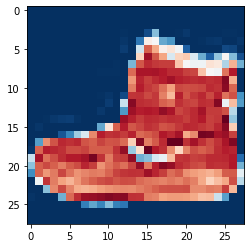

In [ ]:
# show image
plt.imshow(x_train[0],cmap='RdBu_r')

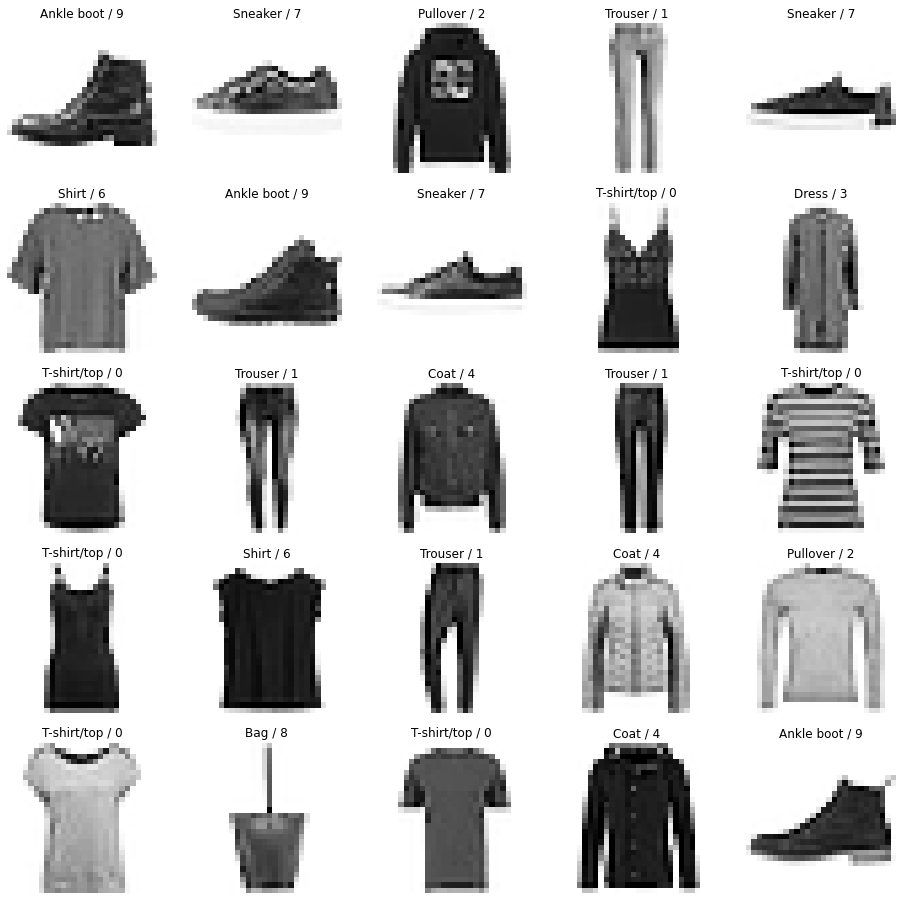

In [ ]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(x_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [ ]:
x_train.ndim

3

In [ ]:
x_train = np.expand_dims(x_train,-1)

In [ ]:
x_train.ndim


NameError: ignored

In [ ]:
x_test = np.expand_dims(x_test,-1)

In [ ]:
#feature scaling

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
#split dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_Validation,y_train,y_Validation=train_test_split(x_train,y_train,test_size=0.2,random_state=2020)


In [ ]:
x_train.shape,x_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1))

In [ ]:
#step 3)Buliding the CNN model

In [ ]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(x_Validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 20s 201ms/step - loss: 0.6528 - accuracy: 0.7825 - val_loss: 0.4246 - val_accuracy: 0.8524
Epoch 2/10
94/94 [==============================] - 18s 196ms/step - loss: 0.3869 - accuracy: 0.8649 - val_loss: 0.3681 - val_accuracy: 0.8746
Epoch 3/10
94/94 [==============================] - 18s 196ms/step - loss: 0.3400 - accuracy: 0.8803 - val_loss: 0.3628 - val_accuracy: 0.8724
Epoch 4/10
94/94 [==============================] - 18s 197ms/step - loss: 0.3110 - accuracy: 0.8915 - val_loss: 0.3274 - val_accuracy: 0.8864
Epoch 5/10
94/94 [==============================] - 18s 196ms/step - loss: 0.2927 - accuracy: 0.8965 - val_loss: 0.3055 - val_accuracy: 0.8947
Epoch 6/10
94/94 [==============================] - 18s 196ms/step - loss: 0.2695 - accuracy: 0.9049 - val_loss: 0.3008 - val_accuracy: 0.8939
Epoch 7/10
94/94 [==============================] - 18s 196ms/step - loss: 0.2552 - accuracy: 0.9087 - val_loss: 0.2919 - val_accuracy: 0.8978

In [ ]:
y_pred = model.predict(x_test)

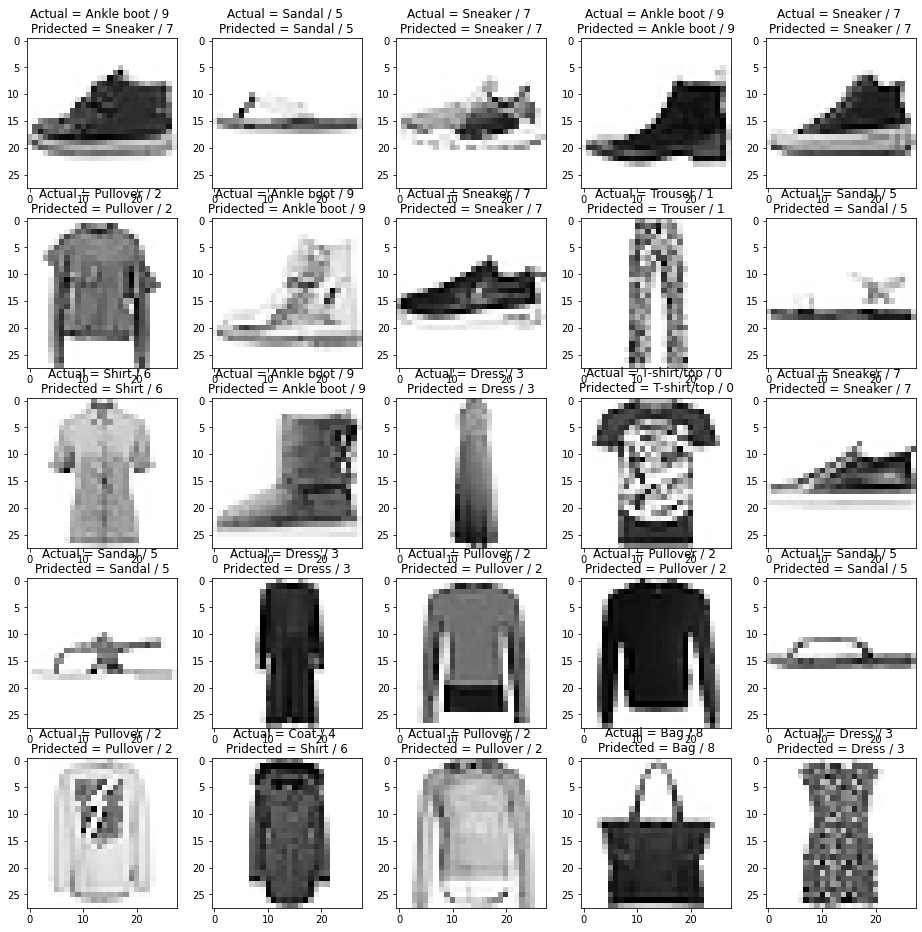

In [ ]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(x_test[i].reshape(28,28),cmap='Greys')
  plt.title('Actual = {} / {} \nPridected = {} / {}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))

In [ ]:
#Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test,y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.82      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.84      0.84      0.84      1000
       Dress       0.88      0.91      0.90      1000
        Coat       0.85      0.84      0.85      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.70      0.73      0.72      1000
     Sneaker       0.91      0.98      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.99      0.92      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



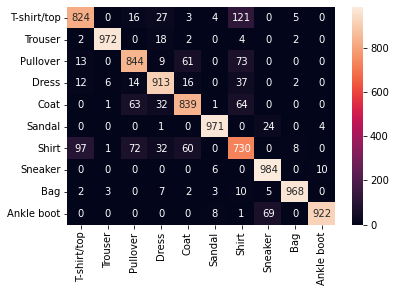

In [ ]:
sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_labels,yticklabels=class_labels)
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_labels,target_names=class_labels)
print(cr)